## 1. Digital Signal Processing

저희의 목적은 소리 signal를 어떠한 데이터 타입으로 표현하며, 소리와 관련된 task를 해결하는데 있습니다. 그렇다면 소리는 어떠한 데이터를 가지고 있을까요?

### Sound?

소리는 일반적으로 진동으로 인한 공기의 압축으로 생성됩니다. 그렇다면 압축이 얼마나 됬느냐에 따라서 표현되것이 바로 Wave(파동)인데요. 파동은 진동하며 공간/매질을 전파해 나가는 현상입니다. 질량의 이동은 없지만 에너지/운동량의 운반은 존재합니다.

Wave에서 저희가 얻을수 있는 정보는 크게 3가지가 있습니다.
- Phase(Degress of displacement) : 위상
- Amplitude(Intensity) : 진폭
- Frequency : 주파수

<img src='./img/air.png' width=50%>

### Sampling

샘플링은 무엇일까요?? 아날로그 정보를 잘게 쪼개서 discrete한 디지털 정보로 표현해야합니다. 우리는 무한하게 쪼개서 저장할수 없으니, 어떤 기준을 가지고 아날로그 정보를 쪼개서 대표값을 취하게 됩니다.

```Convert into a sqeuence of binary values via Sampling and Quantization```

### 1.1. Time domain

시간을 기준으로 아날로그 시그널을 쪼개게 되는 것을 의미합니다. Sampling을 통하여 컴퓨터는 소리 sequence를 binary value로 받아드리게 됩니다.

__Sampling rate : 얼마나 잘게 쪼갤 것인가?__<br>
잘개 쪼갤수록 원본 데이터와 거이 가까워지기 떄문에 좋지만 Data의 양이 증가하게 됩니다. 만약 너무 크게 쪼개게 된다면, 원본 데이터로 reconstruct하기 힘들어 질 것입니다.

<img src='./img/SampleRate.png' width=70%>


__Sampling theorem__<br>
샘플링 레이트가 최대 frequency의 2배 보다 커져야 한다는 것입니다.
$ f_{s} > 2f_{m} $ 여기서 $f_{s}$는 sampling rate, 그리고 $f_{m}$은 maximum frequency를 말합니다.

- Nyqusit frequency = $f_{s}/2$, sampling rate의 절반입니다.

일반적으로 Sampling은 인간의 청각 영역에 맞게 형성이 됩니다.
- Audio CD : 44.1 kHz(44100 sample/second)
- Speech communication : 8 kHz(8000 sample/second)

<img src='./img/hearing.png' width=70%>


__Resampling__

샘플링된 데이터를 다시금 더 높은 sampling rate 혹은 더 낮은 sampling rate로 다시 샘플링할수 있습니다. 이때는 일반적으로 interpolation(보간)을 할때는 low-pass filter를 사용합니다.(Windowed sinc function)

<img src='./img/sinc.png' width=70%>

### 1.2. Quantization

시간의 기준이 아닌 실제 amplitude의 real valued 를 기준으로 시그널의 값을 조절합니다. Amplitude를 이산적인 구간으로 나누고, signal 데이터의 Amplitude를 반올림하게 됩니다.

그렇다면 이산적인 구간은 어떻게 나눌수 있을까요?, bit의 비트에 의해서 결정됩니다. 
- B bit의 Quantization : $-2^{B-1}$ ~ $2^{B-1}-1$
- Audio CD의 Quantization (16 bits) : $-2^{15}$ ~ $2^{15}-1$
- 위 값들은 보통 -1.0 ~ 1.0  영역으로 scaling되기도 합니다.

<img src='./img/Quantization.png' width=70%>

### Python tutorial

파일을 업로드 해봅시다.

scipy.io의 librosa.load 함수의 경우, 파일이름을 인자로 받아서 sample rate와 data를 return 해줍니다. 이때의 데이터 타입은 float 32이며 sampling rate의 디폴트 값은 22050입니다.

- 24-bit 데이터인 wav파일은 읽지 못합니다.
- 32-bit floating-point 나 32-bit PCM 이 권장됩니다.
    - PCM(Pulse code modulation) : 아날로그인 소리신호를 디지털로 표현하기 위한 것입니다.

In [1]:
import librosa
import librosa.display

train_audio_path = 'input'
filename = '/pop.wav'
samples, sample_rate = librosa.load(str(train_audio_path)+filename)

/Users/seungheondoh/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/seungheondoh/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
samples, sample_rate

(array([-0.0249939 , -0.01815796, -0.02023315, ..., -0.36505127,
        -0.4237976 , -0.42385864], dtype=float32), 22050)

In [3]:
len(samples)

661504

In [4]:
len(samples)/z

NameError: name 'z' is not defined

위 데이터를 jupyter notebook 환경에서 재생시킬수도 있습니다.

In [ ]:
import IPython.display as ipd
ipd.Audio(samples, rate=sample_rate)

## 2. Sound Representation

위에서 Sampling된 discrete한 데이터를 이제 우리는 표현이 가능합니다. 그렇다면 어떤 요소를 기반으로 저희가 데이터를 표현해야할까요?, 첫번째는 시간의 흐름에 따라, 공기의 파동의 크기로 보는 Time-domain Representation 방법이 있습니다. 두번째는 시간에 따라서 frequency의 변화를 보는 Time-Frequency representation이 있습니다. 

### 2.1. Time domain - Waveform

Waveform의 경우에는 오디오의 자연적이 표현입니다. 시간이 x축으로 그리고 amplitude가 y축으로 표현이 됩니다.

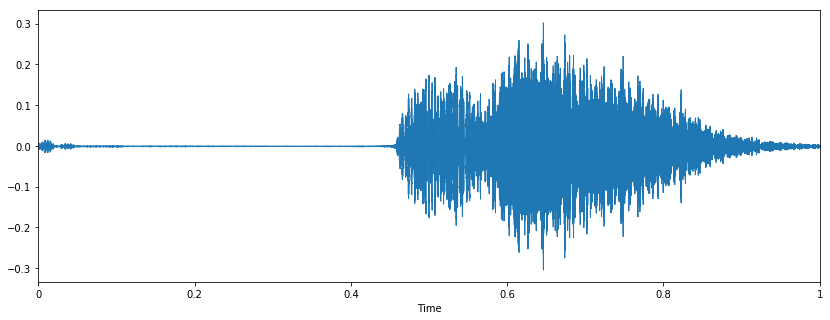

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(samples, sr=sample_rate)

### 2.2. Time-Frequency - Spectrogram

시간축과 주파수 축의 변화에 따라서, 진폭 차이를 색상을 통해 보여줍니다.
스펙토로그램은 소리나 파동을 시각화하여 파악하는 도구로, waveform 과 spectrum의 특징이 조합되어 있습니다.

- waveform : 시간축 변화에 따라 진폭의 변화를 시각화합니다.
- spectrum : 주파수 축의 변화에 따라 진폭축의 변화를 볼수 있습니다.
- spectrogram : 시간축과 주파수 축 변화에 따라 진폭차이를 색상을 통해 보여줍니다.

In [6]:
import numpy as np
from scipy.fftpack import fft
from scipy import signal

def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    nperseq = int(round(window_size*sample_rate / 1e3))
    noverlap = int(round(step_size*sample_rate/ 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                           fs= sample_rate,
                                           window='hann',
                                           nperseg=nperseq,
                                           noverlap=noverlap,
                                           detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32)+eps)

Text(0.5, 0, 'Second')

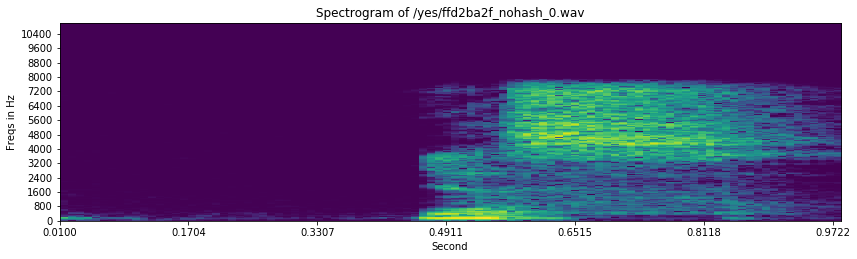

In [7]:
freqs, times, spectogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize = (14,8))
ax2 = fig.add_subplot(212)
ax2.imshow(spectogram.T, aspect='auto', origin='lower',
          extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of '+filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Second')

하지만 여기서 우리는 우리가 sampling 한 데이터 에서는, frequency에 대한 데이터가 없다는 사실을 알 수 있습니다. 그렇다면 frequency에 대한 데이터를 어떻게 확보할 수 있을까요??